# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection as model_selection
import matplotlib.pyplot as plt

In [2]:
raw_df = pd.read_csv("creditcard.csv")

raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print(raw_df[raw_df.Class == 1].shape)

fraud_df = raw_df[raw_df.Class == 1]

(492, 31)


In [4]:
print(raw_df[raw_df.Class == 0].shape)

innocent_df = raw_df[raw_df.Class == 0]

(284315, 31)


In [5]:
bigdata = fraud_df.append(innocent_df.head(fraud_df.shape[0]), ignore_index=True)

In [6]:
print('Jumlah class 1 : {}'.format(bigdata[bigdata.Class == 1].shape[0]))
print('Jumlah class 0 : {}'.format(bigdata[bigdata.Class == 0].shape[0]))
print('Jumlah baris : {}'.format(bigdata.shape[0]))

Jumlah class 1 : 492
Jumlah class 0 : 492
Jumlah baris : 984


In [7]:
print('Apakah ada data yang bernilai Null? {}'.format(bigdata.isnull().values.any()))
print('Apakah ada data yang bernilai NaN? {}'.format(bigdata.isna().values.any()))

Apakah ada data yang bernilai Null? False
Apakah ada data yang bernilai NaN? False


In [8]:
bigdata.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [9]:
bigdata['Class'].unique()

array([1, 0], dtype=int64)

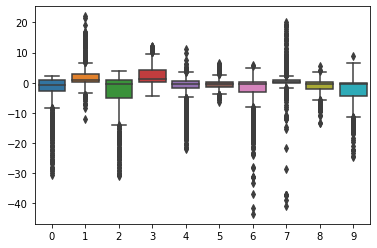

In [10]:
sns.boxplot(data=[bigdata['V1'],bigdata['V2'],bigdata['V3'],bigdata['V4'],bigdata['V5'],bigdata['V6'],bigdata['V7'],bigdata['V8'],bigdata['V9'],bigdata['V10']])

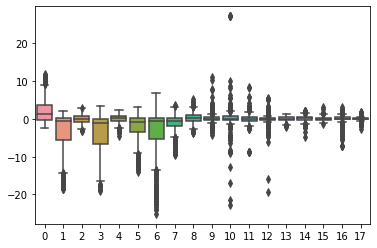

In [11]:
sns.boxplot(data=[bigdata['V11'],bigdata['V12'],bigdata['V13'],bigdata['V14'],bigdata['V15'],bigdata['V16'],bigdata['V17'],bigdata['V18'],bigdata['V19'],bigdata['V20'],bigdata['V21'],bigdata['V22'],bigdata['V23'],bigdata['V24'],bigdata['V25'],bigdata['V26'],bigdata['V27'],bigdata['V28']])

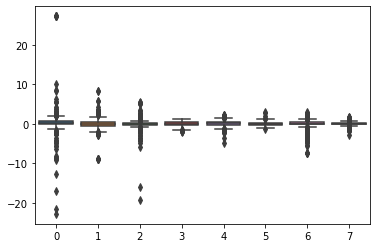

In [12]:
sns.boxplot(data=[bigdata['V21'],bigdata['V22'],bigdata['V23'],bigdata['V24'],bigdata['V25'],bigdata['V26'],bigdata['V27'],bigdata['V28']])

In [13]:
#dataframe yang kalian pake di variable bigdata
#tulis kodingan kalian di bawah sini

In [14]:
y = bigdata['Class']
x = bigdata[['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']]

In [15]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.25,random_state=0)

In [16]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

C:\Users\Firdaus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_pred=logreg.predict(X_test)

In [18]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 96,  31],
       [  1, 118]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

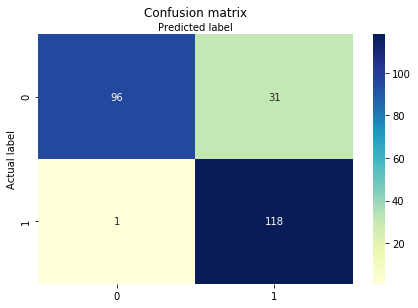

In [19]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [20]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

f1_score = 2 * (precision * recall) / (precision + recall)

print("F1 Score:",f1_score)

Accuracy: 0.8699186991869918
Precision: 0.7919463087248322
Recall: 0.9915966386554622
F1 Score: 0.8805970149253731


# Naive Bayes

In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
from math import sqrt
from math import exp
from math import pi

dfnb = bigdata.copy()



In [22]:
#Fungsi Distribusi Normal

def calculateProbability(x, mean, stdev):

    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))

    return (1/(math.sqrt(2*math.pi)*stdev))*exponent

In [23]:
#Proses Split Data

x = dfnb.copy()

# Import train_test_split function
from sklearn.model_selection import train_test_split

#Proses Split Data dengan ukuran data_test = 30% dan data_train = 70%
x_train, x_test = train_test_split(x, test_size = 0.3, random_state = 123)

df_class01 = x_train[x_train['Class'] == 1]
df_class00 = x_train[x_train['Class'] == 0]

# Variabel dependen
y_train = x_train['Class']
y_test = x_test['Class']


# Variabel independen
x_train = x_train.drop(['Class'], axis = 1)
x_test = x_test.drop(['Class'], axis = 1)
x_train.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
243,74262.0,-2.250535,2.365755,-2.955491,0.089791,-2.830745,-0.844462,-0.174062,-0.407138,0.174216,...,-0.486537,0.256560,-0.466245,0.291105,0.242567,-1.279094,-1.123534,-0.630977,0.326839,311.28
343,102619.0,-2.488363,4.359019,-7.776410,5.364027,-1.823877,-2.445140,-4.964221,1.484890,-2.947899,...,0.792275,1.325672,1.021226,-0.266476,-0.370880,0.365535,0.081372,0.184983,-0.211582,1.00
202,59840.0,-3.215382,-0.364223,-1.261883,3.794949,0.711206,-1.316476,-5.165141,0.625278,-1.582301,...,0.019626,0.401341,0.152191,-0.934675,-0.256148,-0.469403,-0.282496,0.866077,-0.433466,5.91
561,46.0,-1.923213,-0.870482,2.320170,1.988776,0.417091,-0.380014,0.472139,-0.557333,-0.649079,...,-0.369227,-0.686488,-0.779268,1.086055,0.518863,-0.363712,3.065576,-0.589022,-0.396110,35.00
230,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00


In [24]:
#Mencari Standar deviasi dan rata2 dari tiap kelas

df_class01 = df_class01.drop(['Class'], axis = 1)
df_class00 = df_class00.drop(['Class'], axis = 1)

std_01 = df_class01.std()
std_00 = df_class00.std()
mean_01 = df_class01.mean()
mean_00 = df_class00.mean()

print(std_01)
#print()
#print(mean_00)

Time      49065.154550
V1            6.689612
V2            4.207255
V3            6.871955
V4            2.841555
V5            5.359081
V6            1.808411
V7            7.056036
V8            6.565716
V9            2.493296
V10           4.704734
V11           2.624950
V12           4.558946
V13           1.086218
V14           4.244519
V15           1.049142
V16           3.895029
V17           7.097563
V18           2.978549
V19           1.557758
V20           1.320634
V21           3.547597
V22           1.401493
V23           1.741137
V24           0.522547
V25           0.821742
V26           0.433077
V27           1.282688
V28           0.529824
Amount      254.338209
dtype: float64


In [25]:
#Perhitungan probabilitas dari setiap atribut untuk Class = 1

x_test = x_test.sort_index()
y_test = y_test.sort_index()
#x_test = x_test.reset_index()
prob1 = []

for index, row in x_test.iterrows():
    prob = ((calculateProbability(row['Time'], mean_01['Time'], std_01['Time']))*(calculateProbability(row['V1'], mean_01['V1'], std_01['V1']))*(calculateProbability(row['V2'], mean_01['V2'], std_01['V2']))*(calculateProbability(row['V3'], mean_01['V3'], std_01['V3']))*(calculateProbability(row['V4'], mean_01['V4'], std_01['V4']))*(calculateProbability(row['V5'], mean_01['V5'], std_01['V5']))*(calculateProbability(row['V6'], mean_01['V6'], std_01['V6']))*(calculateProbability(row['V7'], mean_01['V7'], std_01['V7']))*(calculateProbability(row['V8'], mean_01['V8'], std_01['V8']))*(calculateProbability(row['V9'], mean_01['V9'], std_01['V9']))*(calculateProbability(row['V10'], mean_01['V10'], std_01['V10']))
    *(calculateProbability(row['V11'], mean_01['V11'], std_01['V11']))*(calculateProbability(row['V12'], mean_01['V12'], std_01['V12']))*(calculateProbability(row['V13'], mean_01['V13'], std_01['V13']))*(calculateProbability(row['V14'], mean_01['V14'], std_01['V14']))*(calculateProbability(row['V15'], mean_01['V15'], std_01['V15']))*(calculateProbability(row['V16'], mean_01['V16'], std_01['V16']))*(calculateProbability(row['V17'], mean_01['V17'], std_01['V17']))*(calculateProbability(row['V18'], mean_01['V18'], std_01['V18']))*(calculateProbability(row['V19'], mean_01['V19'], std_01['V19']))*(calculateProbability(row['V20'], mean_01['V20'], std_01['V20']))
    *(calculateProbability(row['V21'], mean_01['V21'], std_01['V21']))*(calculateProbability(row['V22'], mean_01['V22'], std_01['V22']))*(calculateProbability(row['V23'], mean_01['V23'], std_01['V23']))*(calculateProbability(row['V24'], mean_01['V24'], std_01['V24']))*(calculateProbability(row['V25'], mean_01['V25'], std_01['V25']))*(calculateProbability(row['V26'], mean_01['V26'], std_01['V26']))*(calculateProbability(row['V27'], mean_01['V27'], std_01['V27']))*(calculateProbability(row['V28'], mean_01['V28'], std_01['V28']))*(calculateProbability(row['Amount'], mean_01['Amount'], std_01['Amount'])))
    prob1.append(prob)

len(prob1)

296

In [26]:
#Perhitungan probabilitas dari setiap atribut untuk Class = 0

prob0 = []

for index, row in x_test.iterrows():
    prob = ((calculateProbability(row['Time'], mean_00['Time'], std_00['Time']))*(calculateProbability(row['V1'], mean_00['V1'], std_00['V1']))*(calculateProbability(row['V2'], mean_00['V2'], std_00['V2']))*(calculateProbability(row['V3'], mean_00['V3'], std_00['V3']))*(calculateProbability(row['V4'], mean_00['V4'], std_00['V4']))*(calculateProbability(row['V5'], mean_00['V5'], std_00['V5']))*(calculateProbability(row['V6'], mean_00['V6'], std_00['V6']))*(calculateProbability(row['V7'], mean_00['V7'], std_00['V7']))*(calculateProbability(row['V8'], mean_00['V8'], std_00['V8']))*(calculateProbability(row['V9'], mean_00['V9'], std_00['V9']))*(calculateProbability(row['V10'], mean_00['V10'], std_00['V10']))
    *(calculateProbability(row['V11'], mean_00['V11'], std_00['V11']))*(calculateProbability(row['V12'], mean_00['V12'], std_00['V12']))*(calculateProbability(row['V13'], mean_00['V13'], std_00['V13']))*(calculateProbability(row['V14'], mean_00['V14'], std_00['V14']))*(calculateProbability(row['V15'], mean_00['V15'], std_00['V15']))*(calculateProbability(row['V16'], mean_00['V16'], std_00['V16']))*(calculateProbability(row['V17'], mean_00['V17'], std_00['V17']))*(calculateProbability(row['V18'], mean_00['V18'], std_00['V18']))*(calculateProbability(row['V19'], mean_00['V19'], std_00['V19']))*(calculateProbability(row['V20'], mean_00['V20'], std_00['V20']))
    *(calculateProbability(row['V21'], mean_00['V21'], std_00['V21']))*(calculateProbability(row['V22'], mean_00['V22'], std_00['V22']))*(calculateProbability(row['V23'], mean_00['V23'], std_00['V23']))*(calculateProbability(row['V24'], mean_00['V24'], std_00['V24']))*(calculateProbability(row['V25'], mean_00['V25'], std_00['V25']))*(calculateProbability(row['V26'], mean_00['V26'], std_00['V26']))*(calculateProbability(row['V27'], mean_00['V27'], std_00['V27']))*(calculateProbability(row['V28'], mean_00['V28'], std_00['V28']))*(calculateProbability(row['Amount'], mean_00['Amount'], std_00['Amount'])))
    prob0.append(prob)

len(prob0)

296

In [27]:
#Proses prediksi hasil akhir dari model yang dibuat

pred = []
for i in range(len(prob1)):
    if (prob1[i] >= prob0[i]):
        pred.append(1)
    else:
        pred.append(0)

In [28]:
# import confusion_matrix model
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[138,   3],
       [  0, 155]], dtype=int64)

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       141
           1       0.98      1.00      0.99       155

    accuracy                           0.99       296
   macro avg       0.99      0.99      0.99       296
weighted avg       0.99      0.99      0.99       296



# Decision Tree

In [30]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
import copy

# Function to split the dataset 
def splitdataset(bigdata): 
  
    # Separating the target variable
    batasfeatures = bigdata.shape[1]-1
    # data_test = int(bigdata.shape[0]*0.8)

    # print(batasfeatures)
    X = bigdata.iloc[:, 0:batasfeatures]
    Y = bigdata.iloc[:,batasfeatures]
    # X_train = X.iloc[data_test:]
    # X_test = X.iloc[:data_test]
    # y_train = Y.iloc[data_test:]
    # y_test = Y.iloc[:data_test]

    # Splitting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100) 
    return X, Y, X_train, X_test, y_train, y_test 
      
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 
      
# Function to perform training with entropy. 
def train_using_entropy(X_train, X_test, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 
  
  
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 
      
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
    confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 
  
# Driver code 
def main(): 
      
    # Building Phase 
    data = copy.deepcopy(bigdata)
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data) 
    clf_gini = train_using_gini(X_train, X_test, y_train) 
    clf_entropy = train_using_entropy(X_train, X_test, y_train) 
    # Operational Phase 
    print("Results Using Gini Index:") 
      
    # Prediction using gini 
    y_pred_gini = prediction(X_test, clf_gini) 
    cal_accuracy(y_test, y_pred_gini) 
      
    print("Results Using Entropy:") 
    # Prediction using entropy 
    y_pred_entropy = prediction(X_test, clf_entropy) 
    cal_accuracy(y_test, y_pred_entropy) 
      
      
# Calling main function 
main() 

Results Using Gini Index:
Predicted values:
[0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1
 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1
 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0
 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0
 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0]
Confusion Matrix:  [[133   0]
 [  0 163]]
Accuracy :  100.0
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00       163

    accuracy                           1.00       296
   macro avg       1.00      1.00      1.00       296
weighted avg 